<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/introduction_to_artificial_nerual_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import os 

def reset_graph(seed=42):
  tf.reset_default_graph()
  tf.set_random_seed(seed)
  np.random.seed(seed)
  
%matplotlib inline 

import matplotlib 
import matplotlib.pyplot as plt 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [0]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
x = iris.data[:,(2,3)]
y = (iris.target==0).astype(np.int) 

per_clf = Perceptron(max_iter=100,tol=-np.infty,random_state=42)
per_clf.fit(x,y) 

y_pred = per_clf.predict([[2,0.5]])

In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


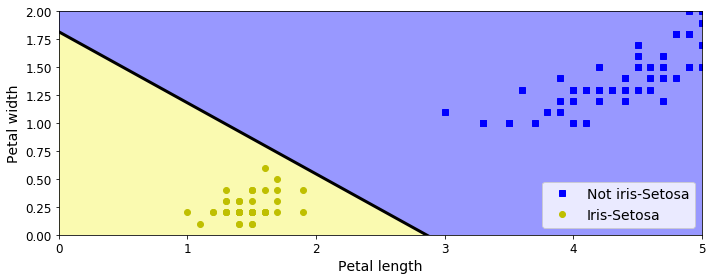

In [4]:
a = -per_clf.coef_[0][0]/per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0,5,0,2]

x0,x1 = np.meshgrid(
np.linspace(axes[0],axes[1],500).reshape(-1,1),
np.linspace(axes[2],axes[3],200).reshape(-1,1),
)

x_new = np.c_[x0.ravel(),x1.ravel()]
y_predict = per_clf.predict(x_new)
zz = y_predict.reshape(x0.shape) 

plt.figure(figsize=(10,4))
plt.plot(x[y==0,0],x[y==0,1],"bs",label="Not iris-Setosa")
plt.plot(x[y==1,0],x[y==1,1],"yo",label="Iris-Setosa")

plt.plot([axes[0],axes[1]],[a*axes[0]+b,a*axes[1]+b],"k-",linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def relu(z):
  return np.maximum(0,z)

def derivative(f,z,eps=0.000001):
  return (f(z+eps)-f(z-eps))/(2*eps)

Saving figure activation_functions_plot


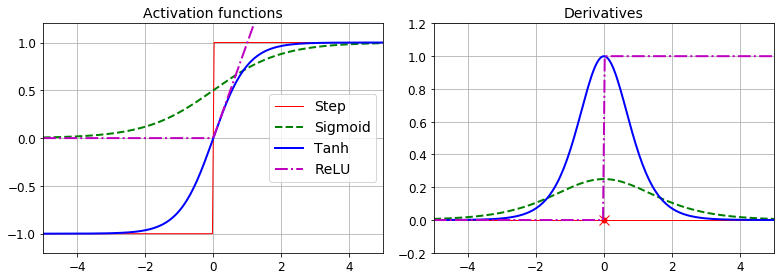

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [0]:
def heaviside(z):
  return (z>=0).astype(z.dtype)

def mlp_xor(x1,x2,activation=heaviside):
  return activation(-activation(x1+x2-1.5)+activation(x1+x2-0.5)-0.5)

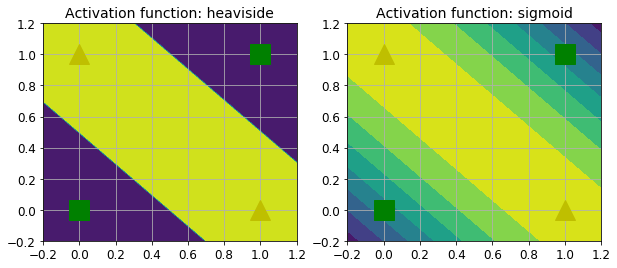

In [10]:

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [0]:
import tensorflow as tf 



In [12]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32).reshape(-1,28*28)/255.0
x_test = x_test.astype(np.float32).reshape(-1,28*28)/255.0
y_train = y_train.astype(np.int32)
y_test =y_test.astype(np.int32)
x_valid,x_train = x_train[:5000],x_train[5000:]
y_valid,y_train = y_train[:5000],y_train[5000:]



11493376/11490434 [==============================] - 0s 0us/step


In [14]:
feature_cols = [tf.feature_column.numeric_column("x",shape=[28*28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100],n_classes=10,
                                    feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
x={"x":x_train},y=y_train,num_epochs=40,batch_size=50,shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpx90okpff', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f14e11df358>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.

In [15]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
x={"x":x_test},y=y_test,shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-02T05:13:35Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpx90okpff/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-02-05:13:35
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9793, average_loss = 0.098040216, global_step = 44000, loss = 12.410154
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /tmp/tmpx90okpff/model.ckpt-44000


In [16]:
eval_results

{'accuracy': 0.9793,
 'average_loss': 0.098040216,
 'global_step': 44000,
 'loss': 12.410154}

In [17]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpx90okpff/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7]),
 'classes': array([b'7'], dtype=object),
 'logits': array([ -9.515486  ,   0.43206745,   0.7595655 ,   9.131345  ,
         -1.9700272 ,  -3.980819  , -18.242382  ,  23.64251   ,
         -2.8960848 ,   6.27773   ], dtype=float32),
 'probabilities': array([3.97799918e-15, 8.31444219e-11, 1.15362185e-10, 4.98747909e-07,
        7.52690098e-12, 1.00772125e-12, 6.45093344e-19, 9.99999523e-01,
        2.98150263e-12, 2.87456068e-08], dtype=float32)}

In [0]:
import tensorflow as tf 

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10 

In [0]:
reset_graph()

x = tf.placeholder(tf.float32,shape=(None,n_inputs),name="x")
y = tf.placeholder(tf.int32,shape=(None),name="y")

In [0]:
def neuron_layer(x,n_neurons,name,activation=None):
  with tf.name_scope(name):
    n_inputs = int(x.get_shape()[1])
    stddev = 2/np.sqrt(n_inputs)
    init = tf.truncated_normal((n_inputs,n_neurons),stddev=stddev)
    w = tf.Variable(init,name="kernel")
    b = tf.Variable(tf.zeros([n_neurons]),name="bias")
    z = tf.matmul(x,w)+b
    if activation is not None:
      return activation(z)
    else : 
      return z 

In [0]:
with tf.name_scope("dnn"):
  hidden1 = neuron_layer(x,n_hidden1,name="hidden1",
                        activation=tf.nn.relu)
  hidden2 = neuron_layer(hidden1,n_hidden2,name="hidden2",
                        activation=tf.nn.relu)
  logits = neuron_layer(hidden2,n_outputs,name="outputs")

In [0]:
with tf.name_scope("loss"):
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
  loss = tf.reduce_mean(xentropy,name="loss")
  
  

In [0]:
learning_rate = 0.01 

with tf.name_scope("train"):
  optimizer = tf.train.GradientDescentOptimizer(learning_rate)
  training_op = optimizer.minimize(loss)
  
  

In [0]:
with tf.name_scope("eval"):
  correct = tf.nn.in_top_k(logits,y,1)
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
n_epochs = 10 
batch_size = 50


In [0]:
def shuffle_batch(x,y,batch_size):
  rnd_idx = np.random.permutation(len(x))
  n_batches = len(x)//batch_size
  for batch_idx in np.array_split(rnd_idx,n_batches):
    x_batch,y_batch = x[batch_idx],y[batch_idx]
    yield x_batch,y_batch

In [29]:
with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    for x_batch,y_batch in shuffle_batch(x_train,y_train,batch_size):
      sess.run(training_op,feed_dict={x:x_batch,y:y_batch})
    acc_batch = accuracy.eval(feed_dict={x:x_batch,y:y_batch})
    acc_val = accuracy.eval(feed_dict={x:x_valid,y:y_valid})
    print(epoch,"batch accuracy:",acc_batch,"val accuracy:",acc_val)
    
  save_path = saver.save(sess,"my_model_final.ckpt")
    

0 batch accuracy: 0.9 val accuracy: 0.9146
1 batch accuracy: 0.92 val accuracy: 0.936
2 batch accuracy: 0.96 val accuracy: 0.945
3 batch accuracy: 0.92 val accuracy: 0.9514
4 batch accuracy: 0.98 val accuracy: 0.956
5 batch accuracy: 0.96 val accuracy: 0.9568
6 batch accuracy: 1.0 val accuracy: 0.9614
7 batch accuracy: 0.94 val accuracy: 0.963
8 batch accuracy: 0.98 val accuracy: 0.965
9 batch accuracy: 0.96 val accuracy: 0.9662


In [30]:
with tf.Session() as sess:
  saver.restore(sess,"my_model_final.ckpt")
  x_new_scaled = x_test[:20]
  z = logits.eval(feed_dict={x:x_new_scaled})
  y_pred = np.argmax(z,axis=1)

INFO:tensorflow:Restoring parameters from my_model_final.ckpt


In [0]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100 
n_outputs = 10 


In [0]:
reset_graph()

x = tf.placeholder(tf.float32,shape=(None,n_inputs),name="x")
y = tf.placeholder(tf.int32,shape=(None),name="y")

In [34]:
with tf.name_scope("dnn"):
  hidden1 = tf.layers.dense(x,n_hidden1,name="hidden1",
                           activation=tf.nn.relu)
  hidden2 = tf.layers.dense(hidden1,n_hidden2,name="hidden2",
                           activation=tf.nn.relu)
  logits = tf.layers.dense(hidden2,n_outputs,name="outputs")
  y_proba = tf.nn.softmax(logits)

Instructions for updating:
Use keras.layers.dense instead.


In [0]:
with tf.name_scope("loss"):
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                           logits=logits)
  loss = tf.reduce_mean(xentropy,name="loss")

In [0]:
learning_rate = 0.01 

with tf.name_scope("train"):
  optimizer = tf.train.GradientDescentOptimizer(learning_rate)
  training_op = optimizer.minimize(loss)

In [0]:
with tf.name_scope("eval"):
  correct = tf.nn.in_top_k(logits,y,1)
  accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [40]:
n_epochs = 20 
n_batches = 50 

with tf.Session() as sess:
  init.run()
  for epoch in range(n_epochs):
    for x_batch,y_batch in shuffle_batch(x_train,y_train,batch_size):
      sess.run(training_op,feed_dict={x:x_batch,y:y_batch})
    acc_batch = accuracy.eval(feed_dict={x:x_batch,y:y_batch})
    acc_valid = accuracy.eval(feed_dict={x:x_valid,y:y_valid})
    
    print(epoch,"batch accuracy:",acc_batch,"validation accuracy:",acc_valid)

    
  save_path  = saver.save(sess,"my_model_final.ckpt")

0 batch accuracy: 0.94 validation accuracy: 0.9026
1 batch accuracy: 0.94 validation accuracy: 0.9244
2 batch accuracy: 0.9 validation accuracy: 0.9364
3 batch accuracy: 0.94 validation accuracy: 0.9412
4 batch accuracy: 0.94 validation accuracy: 0.946
5 batch accuracy: 1.0 validation accuracy: 0.9518
6 batch accuracy: 0.94 validation accuracy: 0.9568
7 batch accuracy: 0.96 validation accuracy: 0.9614
8 batch accuracy: 0.94 validation accuracy: 0.9624
9 batch accuracy: 0.92 validation accuracy: 0.9644
10 batch accuracy: 0.98 validation accuracy: 0.9648
11 batch accuracy: 0.98 validation accuracy: 0.967
12 batch accuracy: 0.98 validation accuracy: 0.9694
13 batch accuracy: 1.0 validation accuracy: 0.969
14 batch accuracy: 0.94 validation accuracy: 0.9716
15 batch accuracy: 0.98 validation accuracy: 0.9722
16 batch accuracy: 1.0 validation accuracy: 0.9732
17 batch accuracy: 0.98 validation accuracy: 0.9744
18 batch accuracy: 0.96 validation accuracy: 0.9742
19 batch accuracy: 1.0 valida